# Test complexity

In this notebook, we are going to to use the module coded in `complexity evaluation` for a given sorting list algorithm

In [59]:
import matplotlib.pyplot as plt

## Modules for comparision

Let's import some of the modules of this repository for comparison

In [60]:
from complexity_evaluation.output_algo import AlgoAnalysis

## Show graph of time computaion

Use the class Algo anlysis which will rrun the a given algorithm for random lists of variate length and keep the time complexity of each.

Let's first test it com `sorted` the internal sorting algorithm of Python for List objects

In [3]:
sorting_algo_analysis = AlgoAnalysis(sorted)

We then produce a dataframe which will keep values of time computation for increasing list lengths.

The `range_length` attribute gives the maximum length until which we want to perform the algorithm. For instance, if we choose `range_length = 1000`, we will run the algorithm for lists of length 1 to 1000.

In [4]:
df_time_sorted = sorting_algo_analysis.calculate_time_multiple_lists(range_length=1000)
df_time_sorted

,raw
1,2.145767e-06
2,1.192093e-06
3,9.536743e-07
4,9.536743e-07
5,1.192093e-06
...,...
996,6.794930e-05
997,9.608269e-05
998,1.769066e-04
999,7.605553e-05


Finally, let's plot the result

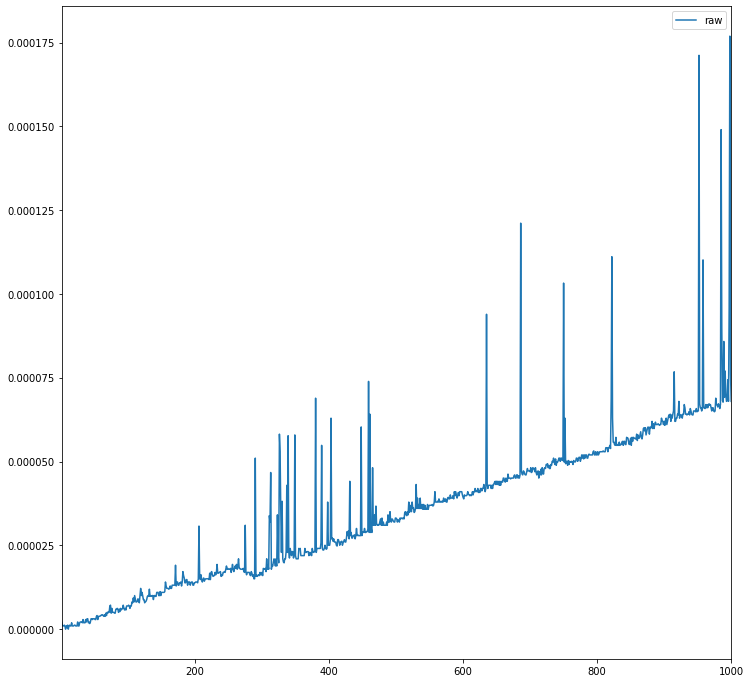

In [14]:
df_time_sorted.plot(figsize=(12, 12))

Even though the curve follows the a certain increasing pattern, we can see that certain lists  took more time compute. 

We then have a kind of **'upper' noise** that we would like to get rid of.
To tackle this issue, the `calculate_time_multiple_lists` method `AlgoAnalysis` object has a parameters called `harmonization` that we can set to `True`
It uses the `l_filter` method of `scipy` which has proved to be quite effective.

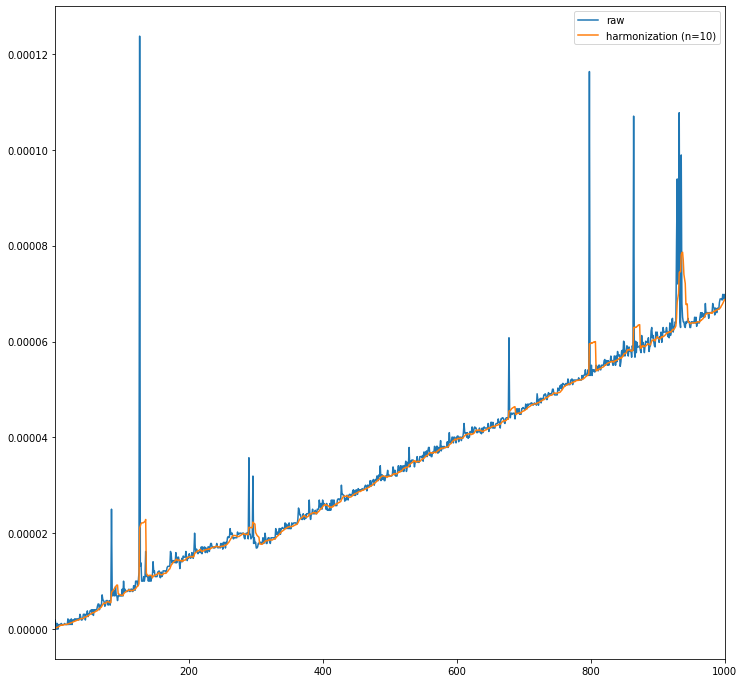

In [18]:
df_time_sorted_harmonized = sorting_algo_analysis.calculate_time_multiple_lists(range_length=1000, 
                                                                                harmonization=True)

df_time_sorted_harmonized.plot(figsize=(12, 12))

We can see that, it chooses by default a paramter `n=10`. <br>
This is the parameter `f_harmonization` that can be tweaked.  <br>
The higher `f_harmonization`, the flatter the curve will be. Let's test that out by passing to `f_harmonization` a list of values.

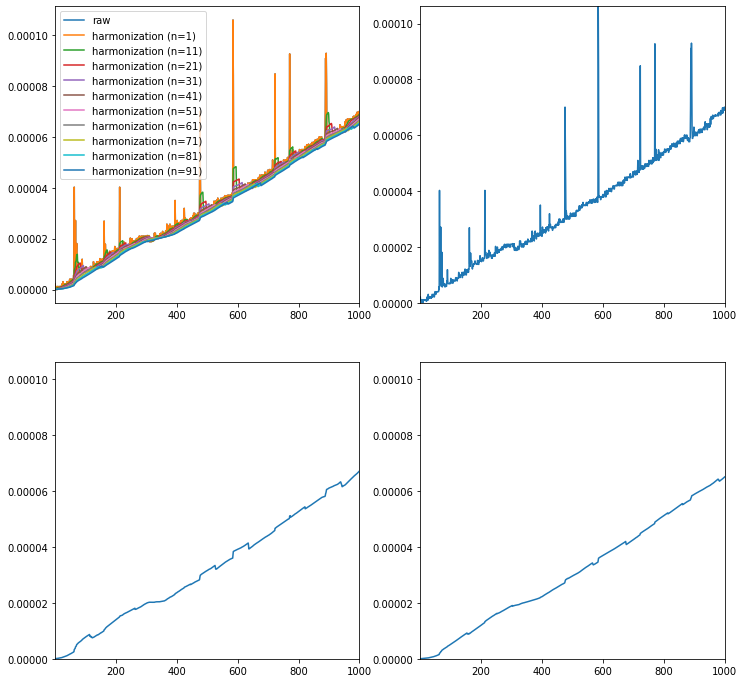

In [56]:
df_time_sorted_harmonized_multiple = sorting_algo_analysis.calculate_time_multiple_lists(range_length=1000, 
                                                                                harmonization=True, 
                                                                                 f_harmonization=list(range(1, 100, 10)))

# Keep maximum time computation as the y_lim value for each plot
max_time = max(df_time_sorted_harmonized_multiple.raw)

fig, axes = plt.subplots(nrows=2, ncols=2)
df_time_sorted_harmonized_multiple.plot(figsize=(12, 12), ax=axes[0, 0])

df_time_sorted_harmonized_multiple['harmonization (n=1)'].plot(figsize=(12, 12), 
                                                                ax=axes[0, 1], 
                                                                ylim=[0, max_time])
df_time_sorted_harmonized_multiple['harmonization (n=51)'].plot(figsize=(12, 12), 
                                                                ax=axes[1, 0],
                                                                ylim=[0, max_time])
df_time_sorted_harmonized_multiple['harmonization (n=91)'].plot(figsize=(12, 12), 
                                                                ax=axes[1, 1],
                                                                ylim=[0, max_time])
